In [1]:
from params import parameters
from dl import get_dataloaders
from model_conf import Forest
from train_conf import Trainer
import pandas as pd
import torch

net = torch.load('./model')

In [2]:
from torch.utils.data import DataLoader, Dataset, random_split

def circle_dl(prms,dataset_length = 1600):
    
    init_dataset = circleDataset(prms)
    params = {'batch_size': prms.train_bs,
          'shuffle': True,
          'num_workers': 6}
    
    lengths = [int(init_dataset.n_samples*0.8), init_dataset.n_samples-int(init_dataset.n_samples*0.8)]
    train_dataset,valid_dataset = random_split(init_dataset, lengths)

    train_loader = DataLoader(train_dataset, **params)
    test_loader = DataLoader(valid_dataset, **params)

    return train_dataset,valid_dataset,train_loader,test_loader

class circleDataset(Dataset):
    
    def __init__(self,prms):
        'Initialization'
        
        self.n_samples = prms.n_samples
        dim = 2 #prms.dim

        self.samples = torch.rand(self.n_samples,dim)
        self.labels  = torch.zeros(self.n_samples)
        self.labels[(self.samples[:,0]-0.5)**2+(self.samples[:,1]-0.5)**2<0.16]=1

        # self.samples = torch.tensor(X.values)
        # self.labels = torch.tensor(Y.values)

In [3]:
# net = Forest(prms)
# net.to(prms.device)

In [4]:
net = torch.load('./model')

In [5]:
import lib
import matplotlib.pyplot as plt

In [6]:
X,Y = lib.generate_circle()


RuntimeError: cuda runtime error (700) : an illegal memory access was encountered at /opt/conda/conda-bld/pytorch_1595629427478/work/aten/src/THC/THCCachingHostAllocator.cpp:278

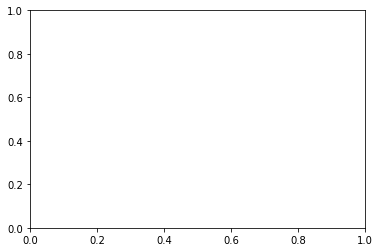

In [7]:
fig, sub = plt.subplots(1,1)
plt.subplots_adjust(wspace=0.5, hspace=0.5)

ax= sub

X0, X1 = X[:, 0], X[:, 1]
xx, yy = lib.make_meshgrid(X0, X1)

# for clf, title, ax in zip(models, titles, sub.flatten()):
lib.plot_2d_function(ax, net, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=Y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xlabel('X0')
ax.set_ylabel('X1')
ax.set_xticks(())
ax.set_yticks(())
# ax.set_title(title)

plt.show()

In [19]:

XX = torch.tensor(xx)

In [20]:
net(XX)

RuntimeError: CUDA error: CUBLAS_STATUS_EXECUTION_FAILED when calling `cublasSgemm( handle, opa, opb, m, n, k, &alpha, a, lda, b, ldb, &beta, c, ldc)`